
# Project: Investigate The TMDB-Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

For the sake of my Case Study I will analyze the Movies Dataset as it seems to be the most interesting among the datasets provided. At a glance there also seems to be a wide range of data types and this will be a good way for me to test out my knowledge gained from the portion in a holistic manner. In this report, I will analyze the data and walk you through my thought process.

In [65]:
# Import of neccesary packages for data analysis
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime



In [66]:
# Now that we have imported the necessary packages lets import the dataset
df= pd.read_csv('tmdb-movies.csv')

# Let preview the Data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [67]:
len(df)

10866

## Questions that arise from the preview:

The above information proposes a whole host of possibilities through which we can analyze and find some insights. For the sake of my analysis I will attempt to answer the following questions:

### Question 1:
#### What factors attribute to creating a successful movie (In terms of proft earned)?

### Question 2:
#### Is there a correlation between the rating of a movie and revenue earned?

In [68]:
# The data seems to be well formatted but we also need to check for any inconsistenncies with the data provided.
# The below summary of the file will be a good starting point for us to begin cleaning the data and understanding
# the file better
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Looking Forward...

A brief observation on the table as well as a brief summary of the info has revealed that there is a bit of missing data. In addition it also seems that some of the columns provided are unnecessary for the sake of our analysis and thus need to be dropped. There should also be a check for an redundancy issues.

The data wrangling portion below will now attempt to clean and prep this data so that we may answer our proposed questions.


<a id='wrangling'></a>
# Data Wrangling and Cleaning

### General Properties

Based on our proposed questions and the brief look at columns, the objectives for Data Wrangling will be to:

1) Remove the unnecessary columns of; ID, Homepage, Tagline, Overview, Budget_adj and Revenue_adj

2) Remove any duplicates

3) Deal with missing data

4) Make it clear that monetary values are presumed to be dollars

5) Change inappropriate formats

In [69]:
# Objective 1: Remove the unnecessary columns
df.drop(['id','homepage','tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [70]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [71]:
#objective 2: Remove any duplicates
sum(df.duplicated())

1

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
#Objective 3: Deal With missing data
# First we need to check null values

df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [74]:
#The best course of action would be to drop null values which have smaller amounts such as imdb_id, cast, director and
#genres
remove = ['imdb_id', 'cast', 'director', 'genres']
df.dropna(subset= remove, how='any', inplace= True)

In [75]:
df.isnull().sum()

imdb_id                   0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
runtime                   0
genres                    0
production_companies    956
release_date              0
vote_count                0
vote_average              0
release_year              0
dtype: int64

In [76]:
#However when physically checking the data, there seems to be alot of 0 values. we need to replace them with NaN
# I have noticed this most in budget, revenue and runtime
change = ['budget', 'revenue', 'runtime']
df[change] = df[change].replace(0,np.NaN)

In [77]:
df.isnull().sum()

imdb_id                    0
popularity                 0
budget                  5574
revenue                 5883
original_title             0
cast                       0
director                   0
runtime                   28
genres                     0
production_companies     956
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

### Compromising volume for value

It is quite disappointing to see that quite a large some of our key data has missing values. It does not seem viable to utilize rolling mean or other interpolation methods as this may skew our results. Therefore the most appropriate method seems to be to simply drop all missing data (This includes null values for production companies)

In [78]:
#Dropping all missing data
df.dropna(inplace=True)

In [79]:
df.isnull().sum()

imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [80]:
len(df)

3805

In [81]:
# Object 4: Label Monetary Values; Since most of the movies listed are from Hollywood, we can assume the monetary figures
# are in USD
df.rename(columns = {'budget' : 'budget_in_USD', 'revenue' : 'revenue_in_USD'}, inplace = True)

In [82]:
# Objective 5: Change column formats to appropriate setting (budget and revenue to int and release date to datetime). 
df.dtypes

imdb_id                  object
popularity              float64
budget_in_USD           float64
revenue_in_USD          float64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [83]:
df.release_date = pd.to_datetime(df['release_date'])

In [84]:
switch = ['budget_in_USD', 'revenue_in_USD']
df[switch] = df[switch].applymap(np.int64)

In [85]:
df.dtypes

imdb_id                         object
popularity                     float64
budget_in_USD                    int64
revenue_in_USD                   int64
original_title                  object
cast                            object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

### Closing Remarks:

Now the data has been properly formated, cleaned and prepped for the analysis protion of this report. Below I will analyze the data in full and attempt to answer the questions

In [86]:
# The Data now looks like this:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
imdb_id                 3805 non-null object
popularity              3805 non-null float64
budget_in_USD           3805 non-null int64
revenue_in_USD          3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 445.9+ KB


<a id='eda'></a>
# Exploratory Data Analysis


## Research Question 1: What factors attribute to creating a successful movie (In terms of profit earned)?

In [87]:
# To first begin answering this question, lets first begin with a general statistical understanding of our data

df.describe()


,popularity,budget_in_USD,revenue_in_USD,runtime,vote_count,vote_average,release_year
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


## Answer Strategy:

The question posed is quite broad and needs to be broken down into smaller questions so that we may peace those pieces together for our final answer. I will attempt to answer the question by analysing relationships within the data that may directly or indirectly relate to gaining higher profit. The questions I will use are as follows:

1) What are the most profitable movies released so far?

* This will allow us to further clean the data and help us to only focus on the most profitable movies through the questions moving forward. 

2) What is the most profitable movie genre?

3) What is the average runtime of the most profitable movie?

4) Which Directors and Actors are most frequently associated with the most profitable movies?

5) What month are the most profitable movies released in?

With the available data, these parameters should prove to be sufficient in answer our overall question!

### Question 1: What are the most profitable movies released so far?

In [88]:
# Question 1: What are the most profitable movies released so far?
# To answer this first we must creat a new column in the dataset calculating the movie profit (revenue - budget)

df.insert(4, 'profit_in_USD', df['revenue_in_USD'] - df['budget_in_USD'])

In [89]:
# Let also convert it to an int
df['profit_in_USD'] = df['profit_in_USD'].apply(np.int64)


In [90]:
df.head(1)

,imdb_id,popularity,budget_in_USD,revenue_in_USD,profit_in_USD,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [91]:
# Now lets set a scope for what should be the minimum for a movie to be considered 'profitable'

df.describe()

,popularity,budget_in_USD,revenue_in_USD,profit_in_USD,runtime,vote_count,vote_average,release_year
count,3805.000000,3.805000e+03,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000
mean,1.203784,3.760800e+07,1.089734e+08,7.136540e+07,109.351117,534.159001,6.170565,2001.229172
std,1.480569,4.232179e+07,1.772976e+08,1.513764e+08,19.845678,883.757588,0.792437,11.329616
min,0.010335,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,10.000000,2.200000,1960.000000
25%,0.470651,1.000000e+07,1.433379e+07,-1.173477e+06,96.000000,74.000000,5.700000,1995.000000
50%,0.810805,2.500000e+07,4.621664e+07,2.047434e+07,106.000000,209.000000,6.200000,2004.000000
75%,1.387163,5.000000e+07,1.260695e+08,8.347333e+07,119.000000,584.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,9767.000000,8.400000,2015.000000


The 50th percentile seems to show the profit to be approximately $20.5M. Thus we will also consider this to be the base line for the most profitable movies.

In [92]:
#New DataFrame
df_profit = df[df['profit_in_USD'] >= 20500000]

# Re-indexing
df_profit.index = range(len(df_profit))

# Initializinf from 1
df_profit.index = df_profit.index + 1

#The new Dataset to answer the overal question!
df_profit.head()

,imdb_id,popularity,budget_in_USD,revenue_in_USD,profit_in_USD,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
2,tt1392190,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
3,tt2908446,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
4,tt2488496,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
5,tt2820852,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [93]:
df_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 1 to 1901
Data columns (total 15 columns):
imdb_id                 1901 non-null object
popularity              1901 non-null float64
budget_in_USD           1901 non-null int64
revenue_in_USD          1901 non-null int64
profit_in_USD           1901 non-null int64
original_title          1901 non-null object
cast                    1901 non-null object
director                1901 non-null object
runtime                 1901 non-null float64
genres                  1901 non-null object
production_companies    1901 non-null object
release_date            1901 non-null datetime64[ns]
vote_count              1901 non-null int64
vote_average            1901 non-null float64
release_year            1901 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(6)
memory usage: 222.9+ KB


In [94]:
len(df_profit)

1901

Our new dataset now only has 1901 entries. This will now be the basis of all further analysis regarding the overall question.

### Question 2: What is the most profitable movie genre?

In [95]:
# This function will help us extract the data we need for the questions to come:
def extract(column_name):
    extract = df_profit[column_name].str.cat(sep = '|')
    extract = pd.Series(extract.split('|'))
    count = extract.value_counts(ascending = False)
    
    return count

In [96]:
genre = extract('genres')

genre.head()

Drama        743
Comedy       687
Action       593
Thriller     578
Adventure    467
dtype: int64

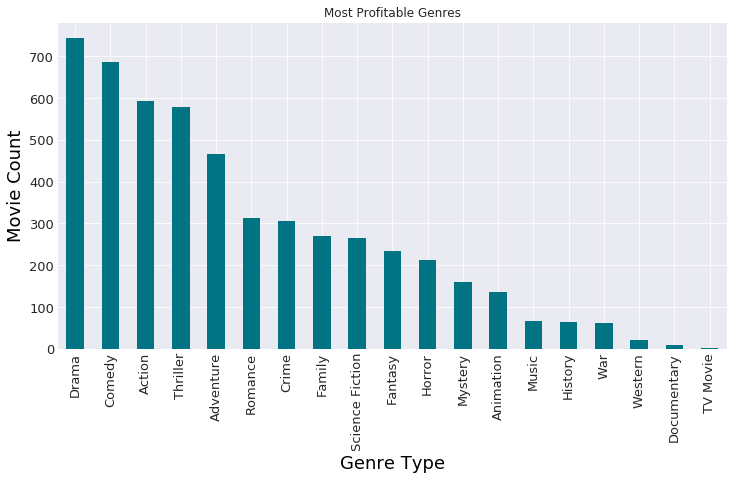

In [97]:
#plotting
genre.sort_values(ascending = False, inplace = True)

#ploting
genre_graph = genre.plot.bar(color = '#007482', fontsize = 13)

#title
genre_graph.set(title = 'Most Profitable Genres')

# X axis
genre_graph.set_xlabel('Genre Type', color = 'black', fontsize = '18')

# Y axis
genre_graph.set_ylabel('Movie Count', color = 'black' , fontsize = '18')

#figure size(width, height)
genre_graph.figure.set_size_inches(12, 6)

#ploting the graph
plt.show()

As we can see the most common type of movie that is profitable is Drama, followed by Commedy and then Action

### Question 3: What is the average runtime of the most profitable movie?

In [98]:
# New func for avg
def runtime_avg_func(column_name):
    return df_profit[column_name].mean()

runtime_avg_func('runtime')

112.27564439768543

It seems that the most profitable movies also have an on average runtime of 112mins. To further review this, let visualize what this may look like:

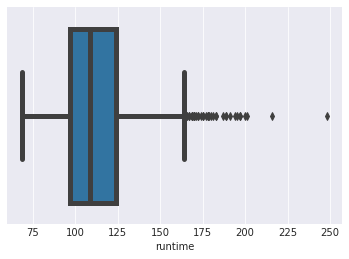

In [104]:
#Seaborn box plot function
sns.boxplot(df_profit['runtime'], linewidth = 5)
plt.show()

As we have analyzed further, the best ratio seems to be between 100 and 125 mins. However some outliers have appeared.

### Question 4: Which Directors and Actors are most frequently associated with the most profitable movies?

In [105]:
directors = extract('director')

directors.head()

Steven Spielberg    25
Clint Eastwood      19
Tim Burton          15
Robert Zemeckis     14
Ridley Scott        13
dtype: int64

In [106]:
actors = extract ('cast')

actors.head()

Tom Cruise        30
Brad Pitt         29
Tom Hanks         28
Robert De Niro    27
Bruce Willis      26
dtype: int64

So it seems the most frequent actors of the most profitable movies are Tom Cruise, Brad Pitt and Tomm Hanks and the most profitable directors are Steven Speilberg, Clint Eastwood and Tim Burton

### Question 5: What month are the most profitable movies released in?

In [107]:
#Indexing Release Date
IRD = df_profit.set_index('release_date')

# grouping all the data by month
groupby_index = IRD.groupby([(IRD.index.month)])

#No. of Movies released in each month
movie_count = groupby_index['profit_in_USD'].count()

#converting table to dataframe
movie_count= pd.DataFrame(movie_count)

#Month List
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


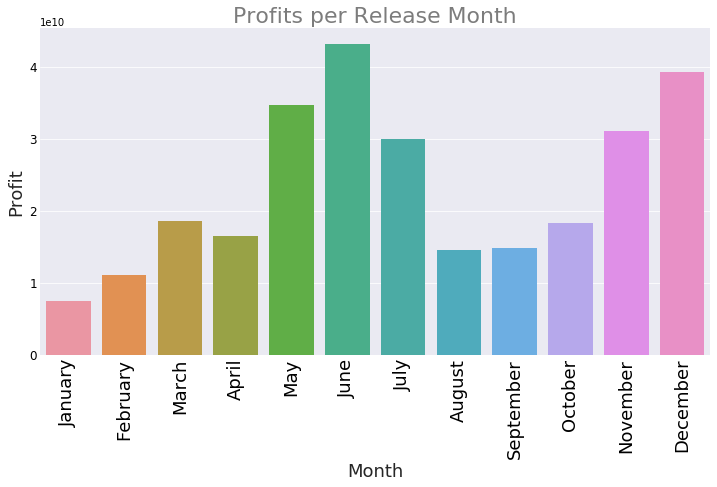

In [108]:
#adding profit value to the group by months
df_profit = groupby_index['profit_in_USD'].sum()

#converting table to a dataframe
df_profit = pd.DataFrame(df_profit)

#using seaborn to visualize our data
df_profit_bar = sns.barplot(x = df_profit.index, y = df_profit['profit_in_USD'], data = df_profit)
sns.set_style("darkgrid")

#Graph Sizing
df_profit_bar.figure.set_size_inches(12,6)

#Title
df_profit_bar.axes.set_title('Profits per Release Month', fontsize = 22, alpha = 0.6)

# X label
df_profit_bar.set_xlabel("Month", fontsize = 18)

#Y label
df_profit_bar.set_ylabel("Profit", fontsize = 18)

#axes values
df_profit_bar.tick_params(labelsize = 12, labelcolor="black")

#rotating the x-axis values
df_profit_bar.set_xticklabels(month_list, rotation = 90, size = 18)

#plot function
plt.show()

It seems that the month which released the most number of profitable movies is June 

## Answer to Research Question 1:

* Based on the Data

To create a successful film, The movie would have to have the following properties:

1) Be a Drama, Comedy, Action of Thriller Movie

2) Run at a lenght around 112mins

3) Star Tom Cruise, Brad Pitt or Tom Hanks while being directed by Steven Speilberg, Clint Eastwood or Tim Burton

4) The movie would also have to be released either in the month of June or secondarily December

These are not neccessarily the be all formula for a successfull film but it can definitly help!

## Research Question 2 : Is there a correlation between the rating of a movie and revenue earned

In [109]:
# Firstly lets begin again with a general overview of the data
df.corr(method='pearson')

,popularity,budget_in_USD,revenue_in_USD,profit_in_USD,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.443626,0.613793,0.594868,0.213690,0.779125,0.319927,0.175991
budget_in_USD,0.443626,1.000000,0.687059,0.525128,0.259562,0.554689,0.022945,0.271915
revenue_in_USD,0.613793,0.687059,1.000000,0.979149,0.249178,0.753574,0.228051,0.141317
profit_in_USD,0.594868,0.525128,0.979149,1.000000,0.219278,0.727533,0.260687,0.089493
runtime,0.213690,0.259562,0.249178,0.219278,1.000000,0.273464,0.359173,-0.113488
vote_count,0.779125,0.554689,0.753574,0.727533,0.273464,1.000000,0.389853,0.209688
vote_average,0.319927,0.022945,0.228051,0.260687,0.359173,0.389853,1.000000,-0.135646
release_year,0.175991,0.271915,0.141317,0.089493,-0.113488,0.209688,-0.135646,1.000000


If we consider vote counts to be objective, then it is observable that there is a possitive correlation between vote counts and the revenue. There is a positive correlation of 0.753574.

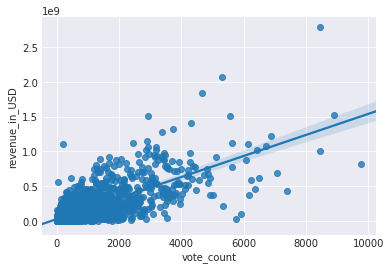

In [110]:
#If we further apply a scatter graph then the distinction is even more apparent
sns.regplot(x=df['vote_count'], y=df['revenue_in_USD'])

The graph further confirms our theory as the regression line is also positive. However there may not neccesarily be a correlation between the data and it may just be that the for the limited instances which we have analysed, correlated in such a manner.  

<a id='conclusions'></a>
## Conclusions

In conclusion the results of the research questions were answered to the best of my abilities and the answers to the questions can be found in their respective sections. Some shorcomings with this project may be that due to the data cleaning, the actual volume of data analyzed had significatly been cut. This may have skewed the results but it was a neccesary risk in order to get as much complete data as possible. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [111]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0